In [1]:
import numpy as np
np.random.seed(2023 - 6 - 13)
import pandas as pd
import matplotlib.pyplot as plt

# ___Estimating a Mean Difference for Paired Data___
-----------------

In [5]:
# Paired data =>
# A type of data that records/measures the a characteristic of a pair of related entities.
# These records won't make much sense when looked at alone.

# e.g. education levels of twins
# e.g. number of fingers in the left and right hands of an individual.
# e.g. ages of couples.

In [6]:
# Consider a survey of educational levels of identical twins.
# Education levels are ranked as a categorical ordinal values.

In [26]:
# Q: What is the average difference between the education levels of twins?

twin_1 = np.random.randint(low = 0, high = 10, size = 100_000)
twin_2 = np.random.randint(low = 4, high = 8, size = 100_000) + np.random.normal(loc = 1, scale = 1.75, size = 100_000)
twin_2 = np.asarray(twin_2, dtype = np.int64)

In [27]:
# Population -> All identical twins.
# Parameter of interest -> Mean of the population of differences between twin education levels. 
# i.e how higher is the twin 1's education compared to twin 2's education.

# difference metrics are notated with a subscript d

# ___$\mu_d = \mu_{twin_1} - \mu_{twin_2}$___

In [28]:
# Population mean difference (true)

pop_diff = twin_1 - twin_2
pop_diff.mean()

-1.49199

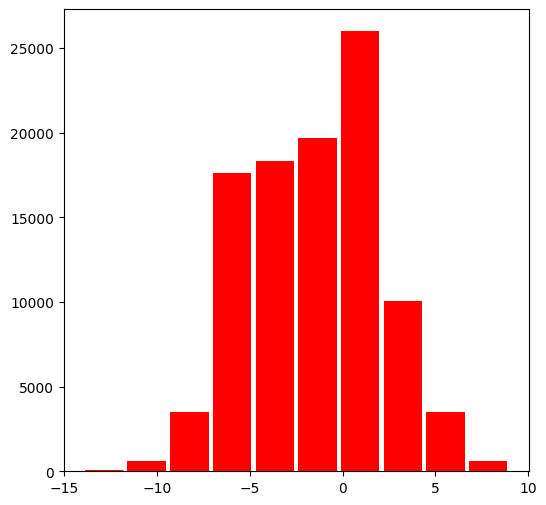

In [29]:
fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.hist(pop_diff, bins = 10, color = "red", rwidth = 0.9)
plt.show()

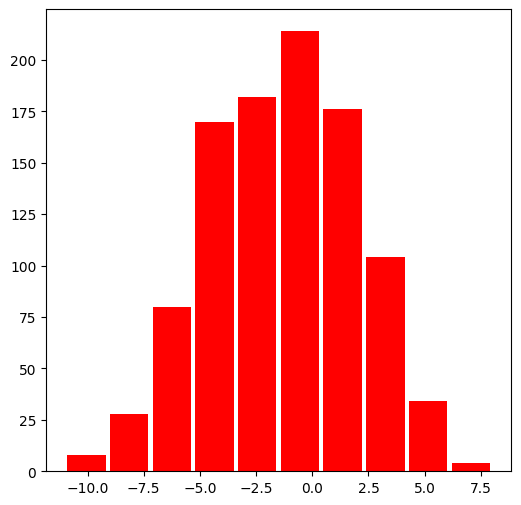

In [33]:
# Let's make a sample of size 1,000

sample = pop_diff[np.random.randint(low = 0, high = pop_diff.size, size = 1000)]

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.hist(sample, bins = 10, color = "red", rwidth = 0.9)
plt.show()

In [34]:
# We have a sample of size 1,000
# And the histogram shows a peak near 0.

print(f"Max @ {sample.max():.4f}, Min @ {sample.min():.4f}")

Max @ 8.0000, Min @ -11.0000


In [35]:
sample.mean()

-1.337

In [36]:
sample.std()

3.4660396708635637

In [37]:
# Confidence intervals => best estimate +- margin of error
# Since the parameter we are interested in is mean, we'd use the t statistic for the multiplier.
# Could we use the same formula as for population mean's confidence interval?

# ___$\bar{X}_d \pm t \cdot (\frac{S_d}{\sqrt{n}})$___

In [38]:
# @ 95% confidence interval, and sample size 1,000
# t = 1.962

moerr = 1.962 * (sample.std() / np.sqrt(sample.size))
moerr

0.2150465760768211

In [39]:
sample.mean() - moerr, sample.mean() + moerr

(-1.5520465760768212, -1.1219534239231788)

In [41]:
pop_diff.mean()

-1.49199

In [42]:
# With 95% confidence, the mean of differences between the education level of twin 1 and twin 2 is estimated to be
# between -1.5520465760768212, -1.1219534239231788

In [43]:
# However, one interesting observation here is that both limits of the confidence interval are on the negative side.
# So, twin 1 almost always has lesser education than twin 2.

In [44]:
# If the education level of twins are equal the mean of difference should be 0.
# If they are not, mean of the differences won't be 0.

In [ ]:
# So, look for 0 in the confidence interval if you are expecting no significant differences between the education levels of the
# twins.